In [94]:
import pandas as pd
import numpy as np
%run similarities.ipynb
from datetime import timedelta

import os
import sys

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
convert={'FIPS': lambda x: str(x)}
main_df = pd.read_csv("../processed_data/combined.csv", converters = convert)
main_df['date'] = main_df['date'].astype(str) + '-20'
main_df['date'] = pd.to_datetime(main_df.date)
main_df["past_week_cases"] = np.mean(main_df[['6_before', '5_before', '4_before', '3_before',
       '2_before', '1_before', '0_before']], axis = 1) 

In [14]:
main_df

,date,state,fips,county,state_code,male,female,median_age,population,female_percentage,...,8_before,7_before,6_before,5_before,4_before,3_before,2_before,1_before,0_before,past_week_cases
0,2020-04-05,Delaware,10001,Kent County,DE,84271,90551,37.6,174822,51.796113,...,4.0,0.0,2.0,7.0,7.0,2.0,11.0,14.0,18.0,8.714286
1,2020-04-05,Delaware,10003,New Castle County,DE,268870,286263,38.1,555133,51.566562,...,25.0,11.0,15.0,41.0,29.0,19.0,34.0,121.0,36.0,42.142857
2,2020-04-05,Delaware,10005,Sussex County,DE,106429,113111,49.0,219540,51.521818,...,22.0,7.0,15.0,7.0,13.0,4.0,12.0,8.0,26.0,12.142857
3,2020-04-05,Florida,12001,Alachua County,FL,127298,135850,31.3,263148,51.624941,...,10.0,4.0,8.0,8.0,3.0,5.0,15.0,6.0,7.0,7.428571
4,2020-04-05,Florida,12003,Baker County,FL,14753,13032,37.6,27785,46.903005,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686092,2020-12-07,Washington,53069,Wahkiakum County,WA,2000,2189,54.3,4189,52.255908,...,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,2.0,1.000000
686093,2020-12-07,Washington,53071,Walla Walla County,WA,30830,29406,37.1,60236,48.817983,...,37.0,34.0,18.0,39.0,25.0,26.0,27.0,28.0,48.0,30.142857
686094,2020-12-07,Washington,53073,Whatcom County,WA,107228,109584,37.0,216812,50.543328,...,14.0,29.0,83.0,76.0,11.0,39.0,32.0,14.0,65.0,45.714286
686095,2020-12-07,Washington,53075,Whitman County,WA,24749,23844,24.6,48593,49.068796,...,14.0,9.0,8.0,27.0,17.0,27.0,16.0,6.0,7.0,15.428571


In [49]:
window_length = 7
window_start = pd.to_datetime("05-25-2020")
window_end = window_start + timedelta(days = window_length)

window_df = main_df[(main_df['date'] >= window_start ) & (main_df['date'] < window_end)].copy()

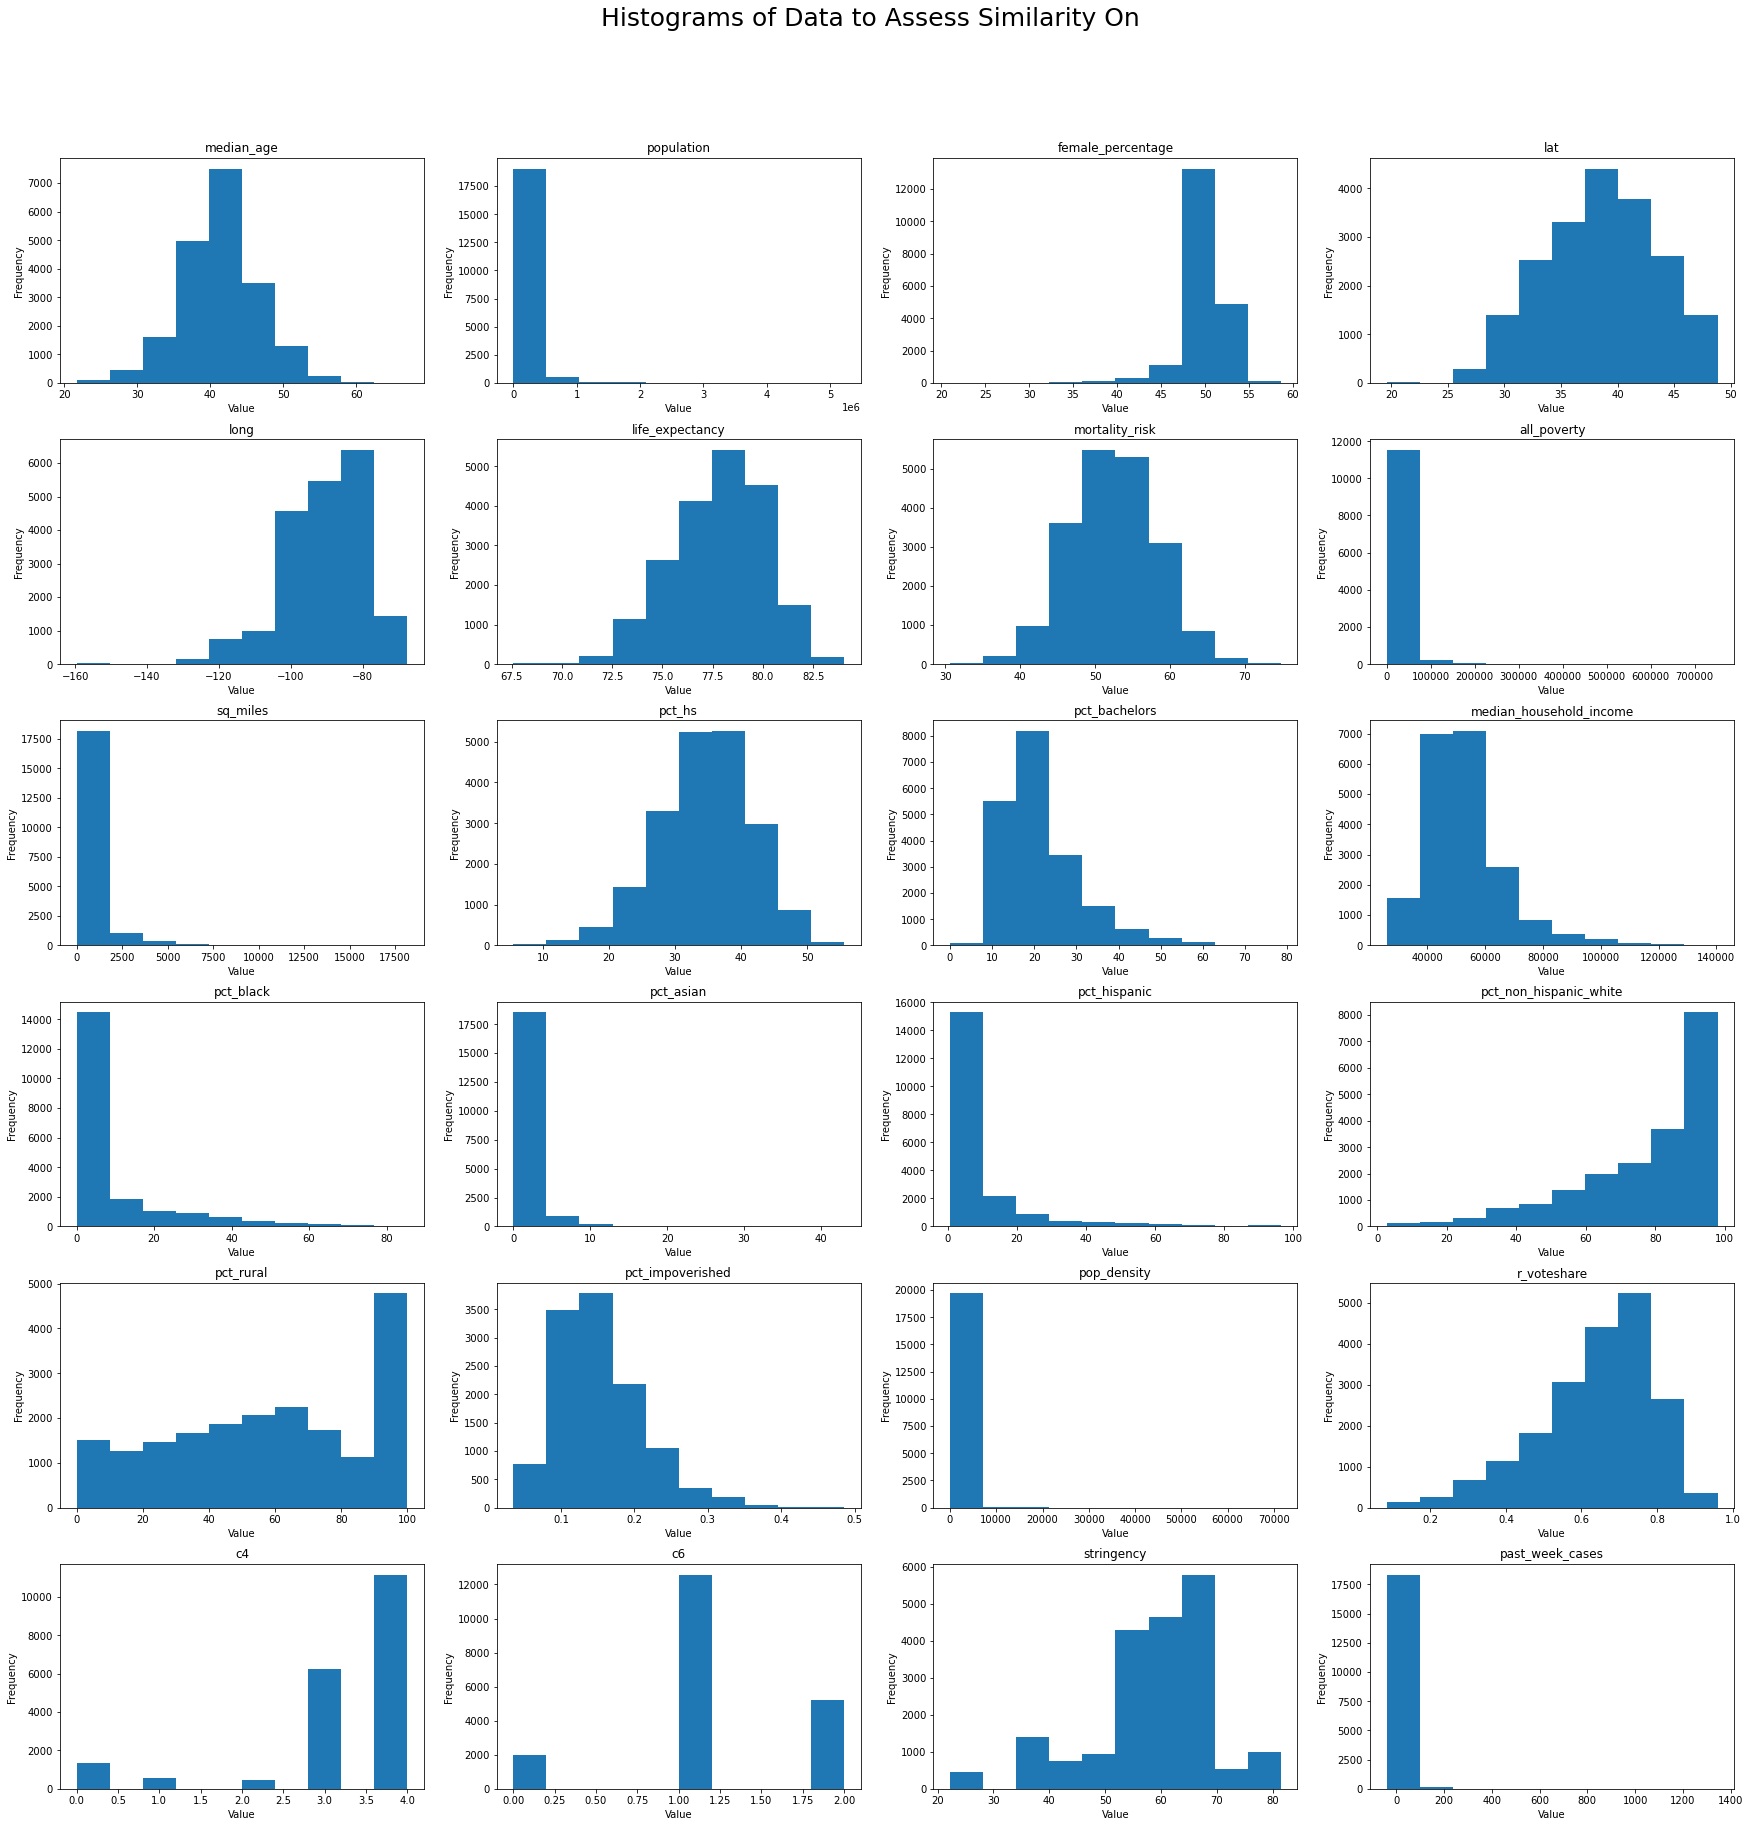

In [54]:
scale_vals = ['median_age', 'population', 'female_percentage', 'lat', 'long',
       'life_expectancy', 'mortality_risk', 'all_poverty', 'sq_miles',
        'pct_hs', 'pct_bachelors', 'median_household_income',
       'pct_black', 'pct_asian', 'pct_hispanic', 'pct_non_hispanic_white',
       'pct_rural', 'pct_impoverished',
       'pop_density', 'r_voteshare', 'c4', 'c6', 'stringency','past_week_cases']

fig, axes = plt.subplots(6,4,figsize = (30,30))


for i, ax in enumerate(axes.ravel()):
    ax.hist(window_df[scale_vals[i]])
    ax.set_title(scale_vals[i])
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Value")

fig.subplots_adjust(hspace = 0.25)
fig.suptitle("Histograms of Data to Assess Similarity On", fontsize = "25", y = 0.95)


plt.show()

In [56]:
scaler = MinMaxScaler().fit(window_df[scale_vals])
window_df[scale_vals] = scaler.transform(window_df[scale_vals])

In [57]:
yes_df = window_df[window_df["protest_size"] != -1].copy()
no_df = window_df[window_df["protest_size"] == -1].copy()

yes_df.drop(["protest_size"], axis = 1, inplace = True)
yes_df.reset_index(inplace = True, drop = True)
no_df.drop(["protest_size"], axis = 1, inplace = True)
no_df.reset_index(inplace = True, drop = True)


comparables = ['median_age', 'population', 'female_percentage', 'lat', 'long',
       'life_expectancy', 'mortality_risk', 'all_poverty', 'sq_miles',
        'pct_hs', 'pct_bachelors', 'median_household_income',
       'pct_black', 'pct_asian', 'pct_hispanic', 'pct_non_hispanic_white',
       'pct_rural', 'pct_impoverished',
       'pop_density', 'r_voteshare', 'c4', 'c6', 'stringency','past_week_cases']

search_df = yes_df[comparables].copy()
compare_df = no_df[comparables].copy()


In [58]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [67]:
nearest_idx = {}
checks = ["pop_density", "past_week_cases", "r_voteshare"]
check_vals = [0.25, 0.25, 0.25]

for idx, row in search_df.iterrows():
    closest = find_approx_closest_euc(compare_df[no_df.date == yes_df.date[idx]].copy(), row,checks,check_vals, 25)
    nearest_idx[(yes_df.fips[idx], yes_df.date[idx])] = no_df.fips[closest].values
    progressbar(idx, yes_df.shape[0])
    
    

 [==================================================] 957/957 Done...



In [69]:
count = 0
for key in nearest_idx:
    count += len(nearest_idx[key]) < 25

print(f"There were {count} records with fewer than the 25 requested most similar counties.")

There were 7 records with fewer than the 25 requested most similar counties.


In [83]:
treatment_effect = []
counterfactual_list = []
outcome = []
fips_list = []
treatment_outcome = "past_week_cases"
time_frame = 14

for key, val in nearest_idx.items():
    
    check_date = key[1] + timedelta(days = time_frame)
    actual = main_df[(main_df.fips == key[0]) & (main_df.date == check_date)][treatment_outcome].values.item()
    if np.isnan(actual):
        continue
    
    if len(val) == 0:
        continue
    
    counterfactual = np.nanmean(main_df[(main_df.fips.isin(val)) & (main_df.date == check_date)][treatment_outcome].values)
    
    if np.isnan(counterfactual):
        continue
        
    fips_list.append(key[0])
    counterfactual_list.append(counterfactual)
    outcome.append(actual)
    treatment_effect.append(actual - counterfactual)
    
treatment_df = pd.DataFrame({'fips': fips_list, 'effect':treatment_effect, 'actual':outcome, 'counter':counterfactual_list})



/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [84]:
treatment = np.mean(treatment_df.effect)
treatment_effect.sort()
treatment_ci = (np.percentile(treatment_effect, 2.5), np.percentile(treatment_effect, 97.5))


print(f"The average treatment effect was {treatment:.4f}, with a 95% confidence interval of {treatment_ci}")

The average treatment effect was 16.4114, with a 95% confidence interval of (-15.574186335403724, 135.49085714285715)


In [ ]:
iterations = 25
grid_outcomes = []


for i in range(iterations):
    grid_outcomes.append(treatment_effect_grid(yes_df, no_df, main_df, comparables, checks, check_vals, 25, 1))
    print(grid_outcomes[i])
    progressbar(i, iterations)